In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

babies = pd.read_csv("babies.csv")

In [2]:
babies = babies.drop(labels='case',axis=1)

babies.columns = ['Weight Baby','Length of Gestation','Was the First Pegrancy',"Mother's Age","Mother's Height","Mother's Weigth",'Is The Mother a Smoker']
babies.head(2)

Weight Baby  Length of Gestation  Was the First Pegrancy  Mother's Age  \
0          120                284.0                       0          27.0   
1          113                282.0                       0          33.0   

   Mother's Height  Mother's Weigth  Is The Mother a Smoker  
0             62.0            100.0                     0.0  
1             64.0            135.0                     0.0

In [3]:
arrCategoryColumns = [x for x in babies.columns  if babies[x].max() == 1 and babies[x].min() == 0]
arrCategoryColumns

['Was the First Pegrancy', 'Is The Mother a Smoker']

In [4]:
for x in range(len(babies['Was the First Pegrancy'])):
    if(babies.loc[x,'Was the First Pegrancy']) == 0:
        babies.loc[x,'Was the First Pegrancy']='Yes'
    else:
        babies.loc[x,'Was the First Pegrancy'] = 'No'
        
for x in range(len(babies['Is The Mother a Smoker'])):
    if(babies.loc[x,'Is The Mother a Smoker']) == 1:
        babies.loc[x,'Is The Mother a Smoker']='Yes'
    else:
        babies.loc[x,'Is The Mother a Smoker'] = 'No'

In [5]:
babies.head(2)

Weight Baby  Length of Gestation Was the First Pegrancy  Mother's Age  \
0          120                284.0                    Yes          27.0   
1          113                282.0                    Yes          33.0   

   Mother's Height  Mother's Weigth Is The Mother a Smoker  
0             62.0            100.0                     No  
1             64.0            135.0                     No

In [6]:
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

In [7]:
if len(babies.columns.drop(labels=arrCategoryColumns))%2 == 0:
    ncols=len(babies.drop(labels=arrCategoryColumns))/2
else:
    ncols = int((len(babies.columns.drop(labels=arrCategoryColumns))/2)) + 1
ncols

3

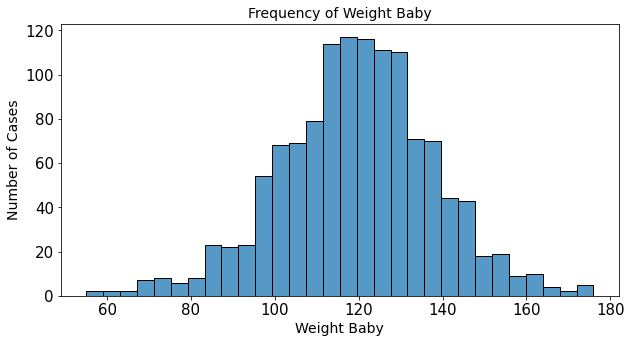

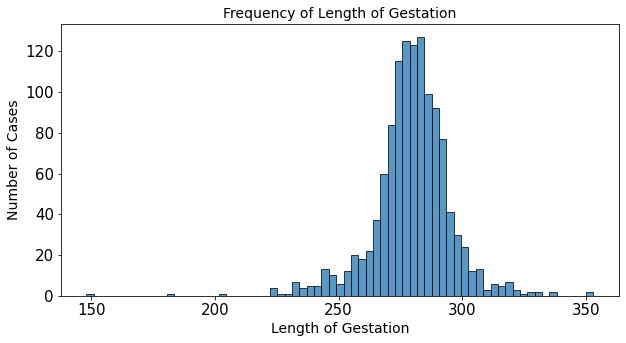

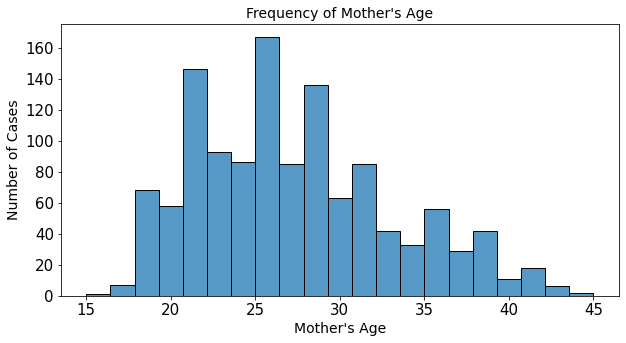

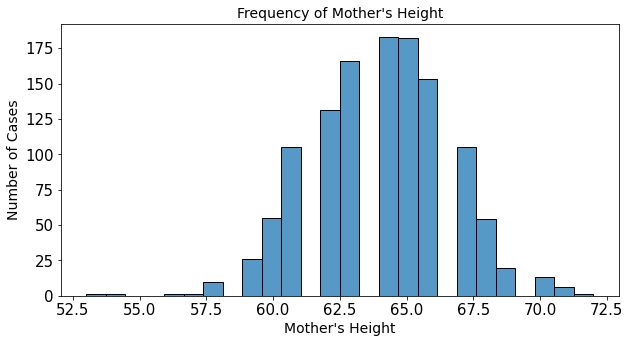

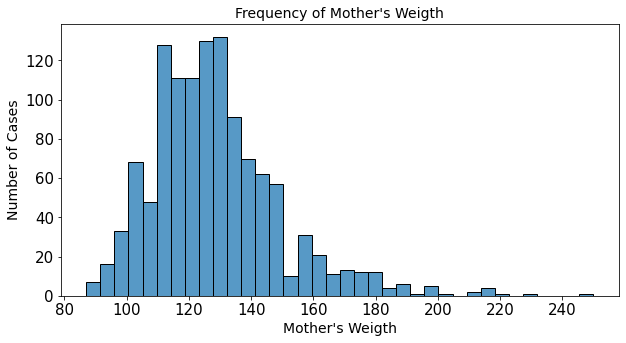

In [8]:
for x in babies.drop(labels=arrCategoryColumns,axis=1).columns:
    plt.figure(figsize=(10,5))
    sns.histplot(x=x,data=babies, palette='pastel')
    plt.tick_params(labelsize=15)
    plt.ylabel('Number of Cases',fontsize=14)
    plt.xlabel('{}'.format(x),fontsize=14)
    plt.title('Frequency of {}'.format(x),fontsize=14)
    plt.show()

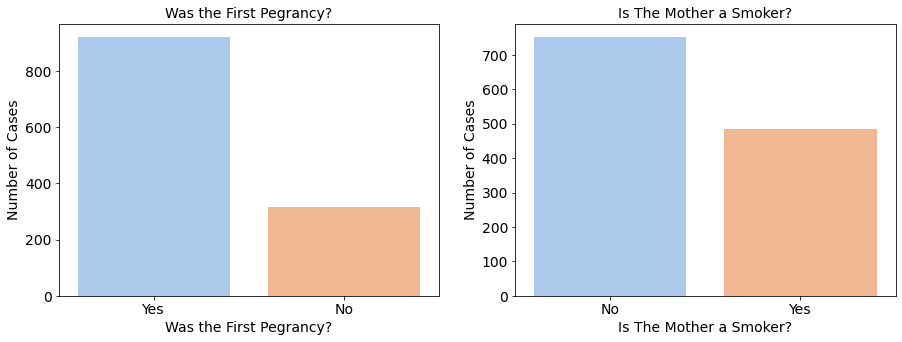

In [9]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
i=0
for x in arrCategoryColumns:

        sns.countplot(x=x,data=babies,palette='pastel',ax=ax[i])
        ax[i].set_xlabel('{}?'.format(x),fontsize=14)
        ax[i].set_ylabel('Number of Cases'.format(x),fontsize=14)
        ax[i].set_title('{}?'.format(x),fontsize=14)
        i+=1
plt.show()

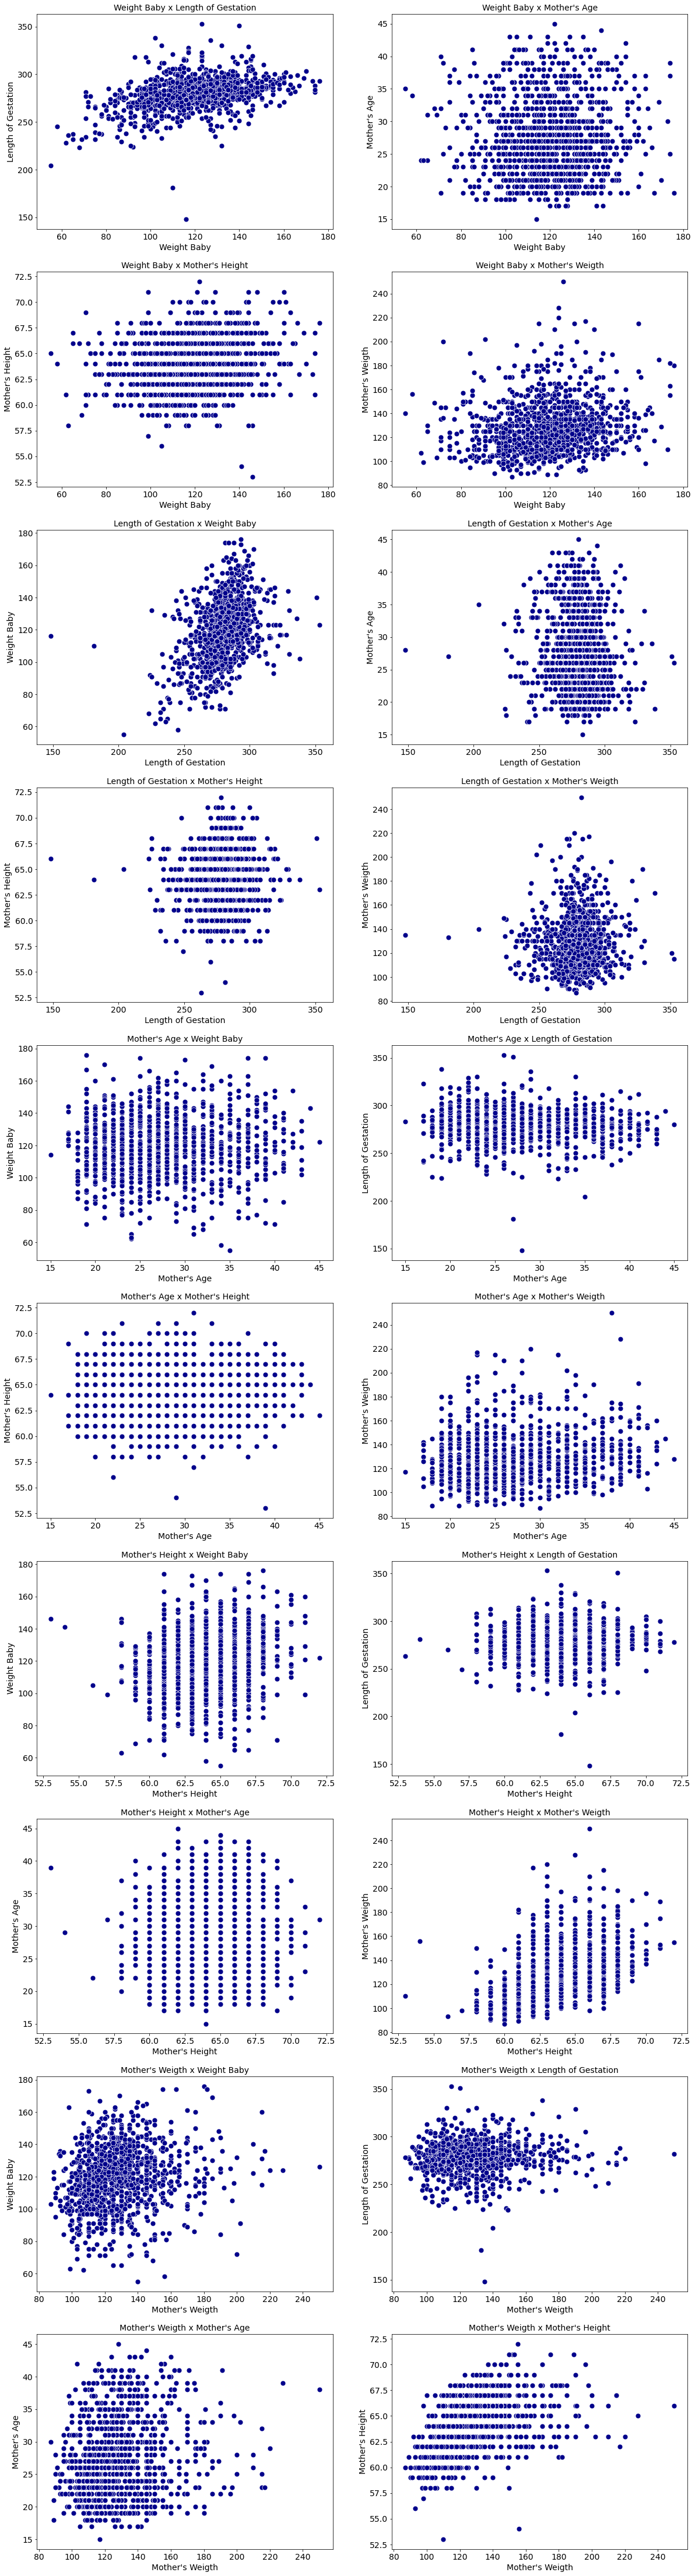

In [10]:
fig,ax = plt.subplots(len(babies.columns.drop(labels=arrCategoryColumns))*2,2,figsize=(20,80))
i, j = 0,0
for x in babies.columns.drop(labels=arrCategoryColumns):
    for y in babies.columns.drop(labels=arrCategoryColumns):
        if x!=y:
            sns.scatterplot(x=x,y=y,data=babies,s=80,ax=ax[i][j],color="darkblue")
            ax[i][j].set_xlabel('{}'.format(x),fontsize=14)
            ax[i][j].set_ylabel('{}'.format(y),fontsize=14)
            ax[i][j].set_title('{} x {}'.format(x,y),fontsize=14)
            if(j==0):
                j=1
            else:
                j=0
                i+=1
plt.show()

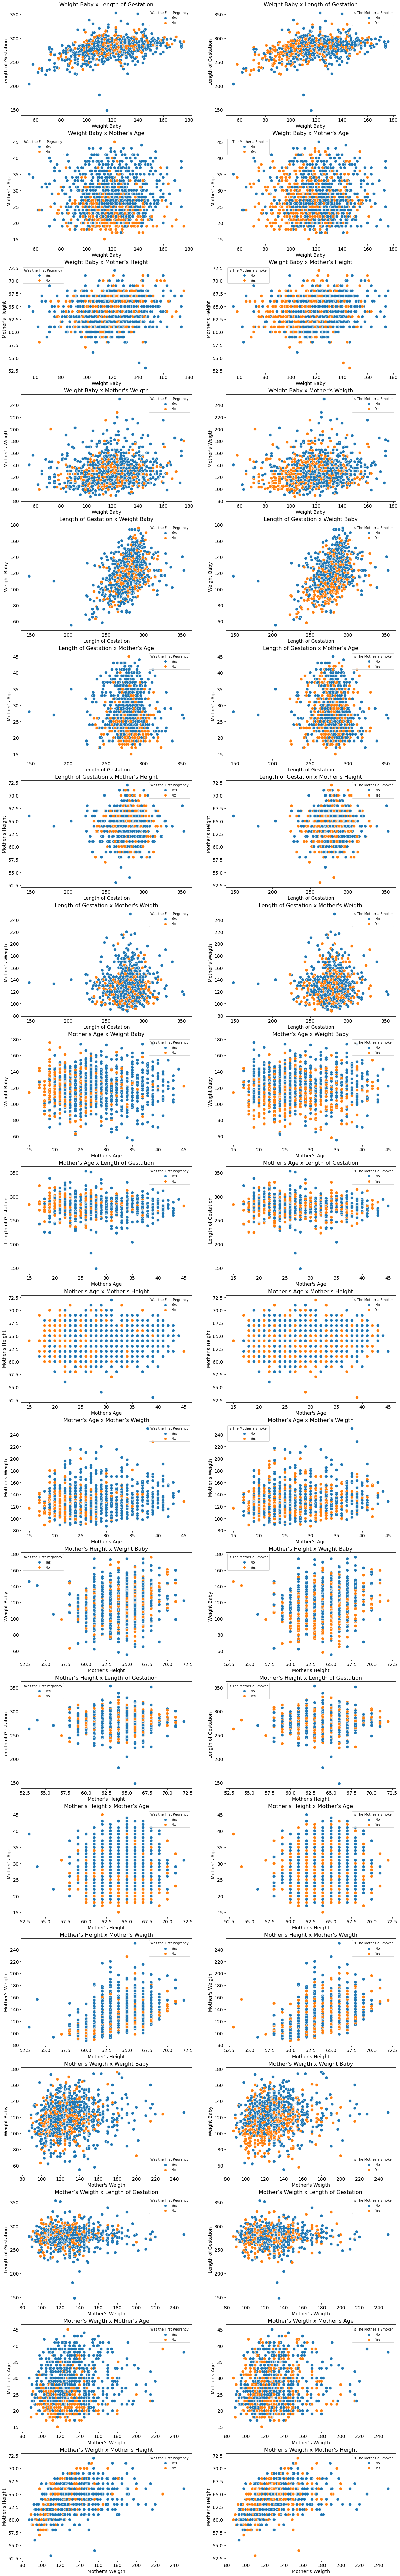

In [11]:
fig,ax = plt.subplots(len(babies.columns.drop(labels=arrCategoryColumns))*4,2,figsize=(20,140))
i, j = 0,0
for x in babies.columns.drop(labels=arrCategoryColumns):
    for y in babies.columns.drop(labels=arrCategoryColumns):
        if x!=y:
            sns.scatterplot(x=x,y=y,data=babies,s=80,ax=ax[i][j],hue='Was the First Pegrancy')
            ax[i][j].set_xlabel('{}'.format(x),fontsize=14)
            ax[i][j].set_ylabel('{}'.format(y),fontsize=14)
            ax[i][j].set_title('{} x {}'.format(x,y),fontsize=16)
            if(j==0):
                j=1
            else:
                j=0
                i+=1
            sns.scatterplot(x=x,y=y,data=babies,s=80,ax=ax[i][j],hue='Is The Mother a Smoker')
            ax[i][j].set_xlabel('{}'.format(x),fontsize=14)
            ax[i][j].set_ylabel('{}'.format(y),fontsize=14)
            ax[i][j].set_title('{} x {}'.format(x,y),fontsize=16)
            if(j==0):
                j=1
            else:
                j=0
                i+=1
plt.show()